In [96]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import glob

In [13]:
articles = pd.DataFrame(columns=['Contents','Type'])

In [86]:
articles_test = pd.DataFrame(columns=['Contents','Type'])

In [18]:
for filename in glob.glob('news_train/**/*.txt'):
    parts = filename.split('/')
    with open(filename,'rb') as file:
        articles = articles.append({'Contents': file.read().decode('utf-16'), 'Type': parts[1]},ignore_index=True)

In [87]:
for filename in glob.glob('news_test/**/*.txt'):
    parts = filename.split('/')
    with open(filename,'rb') as file:
        articles_test = articles_test.append({'Contents': file.read().decode('utf-16'), 'Type': parts[1]},ignore_index=True)

In [27]:
import regex

In [47]:
articles['Contents_no_punc']=articles.Contents.map(lambda x: regex.sub("\p{P}+", "", x))
articles['Contents_no_punc_no_number'] = articles.Contents_no_punc.map(lambda x: regex.sub("\d+","", x))
articles['Contents_no_punc_no_number_utf8'] = articles.Contents_no_punc_no_number.map(lambda x: x.encode('utf-8').decode('utf-8'))

In [88]:
articles_test['Contents_no_punc']=articles_test.Contents.map(lambda x: regex.sub("\p{P}+", "", x))
articles_test['Contents_no_punc_no_number'] = articles_test.Contents_no_punc.map(lambda x: regex.sub("\d+","", x))
articles_test['Contents_no_punc_no_number_utf8'] = articles_test.Contents_no_punc_no_number.map(lambda x: x.encode('utf-8').decode('utf-8'))

In [66]:
articles[['Contents_no_punc_no_number_utf8','Type']].to_csv('all_news.csv',index=False)

In [89]:
articles_test[['Contents_no_punc_no_number_utf8','Type']].to_csv('all_news_test.csv',index=False)

In [67]:
articles['Tokens'] = articles.Contents_no_punc_no_number_utf8.map(lambda x: x.split())

In [90]:
articles_test['Tokens']=articles_test.Contents_no_punc_no_number_utf8.map(lambda x: x.split())

In [91]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.linear_model import SGDClassifier
from sklearn.pipeline import Pipeline

In [133]:
text_clf = Pipeline([('count',CountVectorizer()),('tfidf',TfidfTransformer()),('svm',SGDClassifier(loss='hinge'))])

In [134]:
text_clf.fit(X=articles.Contents_no_punc_no_number_utf8, y=articles.Type)

Pipeline(steps=[('count', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        stri...   penalty='l2', power_t=0.5, random_state=None, shuffle=True,
       verbose=0, warm_start=False))])

In [135]:
pred = text_clf.predict(articles_test.Contents_no_punc_no_number_utf8)

In [136]:
from sklearn.metrics import classification_report, confusion_matrix

In [137]:
print(classification_report(y_true=articles_test.Type,y_pred=pred))

                      precision    recall  f1-score   support

             Am nhac       0.88      0.96      0.92       813
             Am thuc       0.96      0.92      0.93       400
        Bat dong san       0.95      0.94      0.95       282
             Bong da       0.98      1.00      0.99      1464
         Chung khoan       0.96      0.97      0.97       320
              Cum ga       0.98      0.99      0.98       381
    Cuoc song do day       0.71      0.77      0.74       405
              Du hoc       0.93      0.95      0.94       394
             Du lich       0.92      0.96      0.94       565
       Duong vao WTO       0.96      0.83      0.89       191
            Gia dinh       0.82      0.57      0.67       280
    Giai tri tin hoc       0.81      0.82      0.82       707
            Giao duc       0.91      0.88      0.90       707
           Gioi tinh       0.83      0.94      0.88       268
    Hackers va Virus       0.96      0.92      0.94       319
       

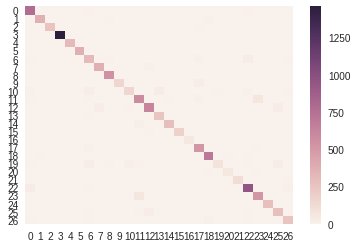

In [138]:
sns.heatmap(confusion_matrix(articles_test.Type, pred))

In [99]:
from sklearn.naive_bayes import  MultinomialNB
mulNB = Pipeline([('count',CountVectorizer()),('tfidf',TfidfTransformer()),('nb',MultinomialNB())])

In [100]:
mulNB.fit(articles.Contents_no_punc_no_number_utf8,articles.Type)

Pipeline(steps=[('count', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        stri...linear_tf=False, use_idf=True)), ('nb', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))])